In [30]:
import os
# Using GDrive storage as file-system for experimentation
from google.colab import drive
try:
  drive.mount('/content/gdrive')
  os.chdir('gdrive/My Drive/PanIIT2020')
except:
  pass
master_dir = os.getcwd()
data_dir = os.path.join(master_dir,'datasets')

# Removing Permission if you want to unmount
# https://myaccount.google.com/permissions

master_dir

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'/content/gdrive/My Drive/PanIIT2020'

In [0]:
import os, shutil, sys
from datetime import datetime

import numpy as np, scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.colors as mcolors

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [0]:
csv_names = {
    'HOSPITAL'     : 'Bangalore_hospital.csv',
    'ROAD_ACCIDENT': 'Accident_Dataset.csv',
    'WATER'        : 'Water_Revenue_Data_Bengaluru_2013-14to2017-18_1.csv',

    'AQI'          : 'Air_Quality_Bengaluru_2017to2018.csv',
    'DEMOGRAPHY'   : 'Demographic_Profile_Bengaluru_ason_01-03-2011_1.csv',
    'HOUSEHOLD'    : 'Household_Profile_Bengaluru_ason_01-03-2011.csv',
    'VEHICLEDATA'  : 'Vehicle_Registrations_Data_Bengaluru_from2014-15to2017-18.csv',

    'SOLIDWASTE'   : 'Solid_Waste_Ward_Wise_Segregation_Data_Bengaluru_ason01-01-2019.csv',
    'WASTEVEHICLE' : 'Waste_Collection_Vehicle_Data_Bengaluru_ason_01-01-2019.csv',

    'SCHOOLS'      : 'SchoolsLocCoord.csv',
    

    # 'INJURIES'     : 'Injuries_and_Fatalities_Bengaluru_from_2016to2018.csv',
    # 'BUSES'        : 'No_of_buses_Bengaluru_from2015-16to2017-18.csv',


}

In [0]:
#### HOSPITAL DATASETS ####

In [7]:
df_hospital = pd.read_csv(os.path.join(data_dir,csv_names['HOSPITAL']))

# df_hospital = df_hospital.dropna(axis='rows',how='all')
# df_hospital = df_hospital.dropna(axis='columns')

df_hospital.head(2)

,Sr_No,Location_Coordinates,Location,Hospital_Name,Hospital_Category,Hospital_Care_Type,Discipline_Systems_of_Medicine,Address_Original_First_Line,State,District,Subdistrict,Pincode,Telephone,Mobile_Number,Emergency_Num,Ambulance_Phone_No,Bloodbank_Phone_No,Foreign_pcare,Tollfree,Helpline,Hospital_Fax,Hospital_Primary_Email_Id,Hospital_Secondary_Email_Id,Website,Specialties,Facilities,Accreditation,Hospital_Regis_Number,Registeration_Number_Scan,Nodal_Person_Info,Nodal_Person_Tele,Nodal_Person_Email_Id,Town,Subtown,Village,Establised_Year,Ayush,Miscellaneous_Facilities,Number_Doctor,Num_Mediconsultant_or_Expert,Total_Num_Beds,Number_Private_Wards,Num_Bed_for_Eco_Weaker_Sec,Empanelment_or_Collaboration_with,Emergency_Services,Tariff_Range,State_ID,District_ID
0,11830,"12.9922015, 77.5821803","40/12, Kumara Krupa Road, Kumara Park East",Accident Relife Care,0,0,0,"40/12, Kumara Krupa Road, Kumara Park East",Karnataka,Bengaluru Urban,0,560001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,29,572
1,11831,"12.991414, 77.5925026","Cunnigham Road, 2Nd Cross No:3",Al-Ameen Hospital,0,0,0,"Cunnigham Road, 2Nd Cross No:3",Karnataka,Bengaluru Urban,0,560001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,29,572


433 433 433
12.8769547 77.4971113 560001
13.0688367 77.6877765 560104
12.967561916628176 77.58469989445726
0.040378749678722146 0.039289799904552496


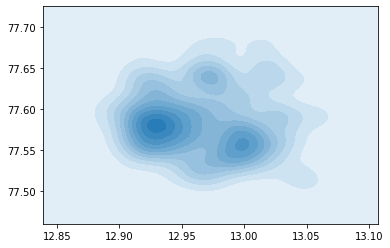

In [8]:
#Visualising hospitals
hosp_lat, hosp_long,hosp_pin = [], [], []
hosp_loc2pin = {}

for ix, loc_str in enumerate( df_hospital['Location_Coordinates'] ):
  try:
    loc_lat, loc_long = eval(loc_str)
    pincode = int(df_hospital['Pincode'][ix])
    if abs(loc_lat-12.97)<=0.1 and abs(loc_long-77.59)<=0.1 and pincode:
      # print(loc_lat, loc_long)
      hosp_lat.append(loc_lat)
      hosp_long.append(loc_long)
      hosp_loc2pin[ (loc_lat, loc_long) ] = pincode
  except:
    pass

hosp_lat, hosp_long = np.array(list(set(list(zip(hosp_lat, hosp_long))))).T
hosp_pin = np.array([ hosp_loc2pin[(loc_lat, loc_long)] for (loc_lat, loc_long) in zip(hosp_lat, hosp_long)])

print( len(hosp_lat), len(hosp_long), len(hosp_pin) )
print( min(hosp_lat), min(hosp_long), min(hosp_pin) )
print( max(hosp_lat), max(hosp_long), max(hosp_pin) )

print( hosp_lat.mean(), hosp_long.mean()   )
print( hosp_lat.std(),  hosp_long.std() )

sns.kdeplot(hosp_lat, hosp_long, shade=True)
plt.show()
# hosp_lat[0], hosp_long[0]

In [0]:
#### ACCIDENTS DATASETS ####

468 468 500 500
12.8769547 77.4971113 2018-01-10 00:03:00
13.0688367 77.6877765 2018-12-12 23:58:00
12.946762771217948 77.61183788267094
0.07955487498963051 0.04500935815453131


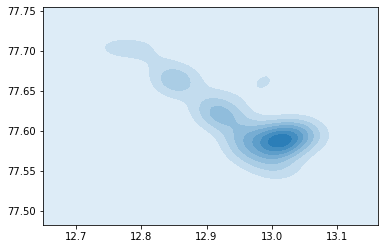

In [10]:
#Visualising hospitals
acc_lat, acc_long, acc_date, acc_time = [], [], [], []
with open( os.path.join(data_dir,csv_names['ROAD_ACCIDENT']) ) as acc_file:
  for line in acc_file.readlines():
    if line:
      temp = line.strip().split('\t')
      try:
        loc_lat, loc_long = float(temp[0]), float(temp[1])
        if abs(loc_lat-12.90)<=0.1 and abs(loc_long-77.63)<=0.1:
          val_date = datetime.strptime(temp[2],'%d/%m/%Y').date()
          val_time = datetime.strptime(temp[-1],'%H:%M').time()
        acc_lat.append(  loc_lat )
        acc_long.append( loc_long )
        acc_date.append( val_date )
        acc_time.append( val_time )
      except:
        pass


acc_lat, acc_long = np.array(list(set(list(zip(acc_lat, acc_long))))).T

print( len(acc_lat), len(acc_long), len(acc_date), len(acc_time) )
print( min(hosp_lat), min(hosp_long), min(acc_date), min(acc_time) )
print( max(hosp_lat), max(hosp_long), max(acc_date), max(acc_time) )

print( acc_lat.mean(), acc_long.mean()   )
print( acc_lat.std(),  acc_long.std() )

sns.kdeplot(acc_lat, acc_long, shade=True)
plt.show()

In [11]:
print( abs(acc_lat.mean()-hosp_lat.mean())*111, abs(acc_long.mean()-hosp_long.mean())*111   )

2.3087051405353183 3.012316691718624


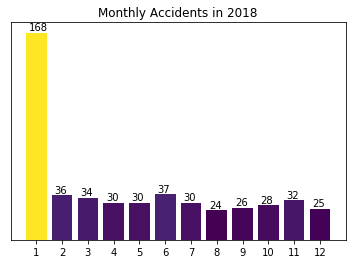

In [12]:
n_bins = 12
hist_obj = plt.hist(acc_date, rwidth=0.8,bins = n_bins)
bins = len(hist_obj[0])

# https://matplotlib.org/3.1.1/gallery/statistics/hist.html

# We'll color code by height, but you could use any scalar
N, bins, patches = hist_obj
# fracs = (N-N.min()) / (N.max()-N.min())
fracs = N / N.max()
# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())
# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
  color = plt.cm.viridis(norm(thisfrac))
  thispatch.set_facecolor(color)

x_pos = []
for ix in range(n_bins):
  plt.text( hist_obj[1][ix]+(hist_obj[1][1]-hist_obj[1][0])/5, hist_obj[0][ix]+2, str(int(hist_obj[0][ix])) )
  x_pos.append(hist_obj[1][ix])

locs, labels = plt.xticks() # Get locations and labels

x_pos = np.array(x_pos)
x_pos = x_pos + (x_pos[1]-x_pos[0])/2
# print(x_pos)
# print(locs)
plt.xticks( x_pos, list(range(1,n_bins+1)) )

plt.yticks([])

plt.title('Monthly Accidents in 2018')
plt.savefig( 'Monthly Accidents in 2018.PNG' , format='PNG' , dpi=600 , bbox_inches='tight' ,transparent=True)
plt.show()

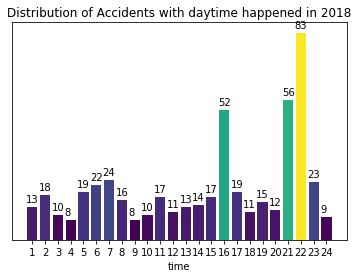

In [13]:
n_bins = 24
hist_obj = plt.hist(acc_time, rwidth=0.8,bins = n_bins)

# https://matplotlib.org/3.1.1/gallery/statistics/hist.html
# We'll color code by height, but you could use any scalar
N, bins, patches = hist_obj
fracs = N / N.max()
# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())
# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

x_pos = []
for ix in range(n_bins):
  plt.text( hist_obj[1][ix], hist_obj[0][ix]+2, str(int(hist_obj[0][ix])) )
  x_pos.append(hist_obj[1][ix])

locs, labels = plt.xticks() # Get locations and labels

x_pos = np.array(x_pos)
x_pos = x_pos + (x_pos[1]-x_pos[0])/2
# print(x_pos)
# print(locs)
plt.xticks( x_pos, list(range(1,n_bins+1)) )

plt.yticks([])

plt.title('Distribution of Accidents with daytime happened in 2018')
plt.savefig( 'Distribution of Accidents with daytime happened in 2018.PNG' , format='PNG' , dpi=600 , bbox_inches='tight' ,transparent=True)
plt.show()

(12.649776584943059, 13.161828105056943) (77.46000039653612, 77.75465530390785)


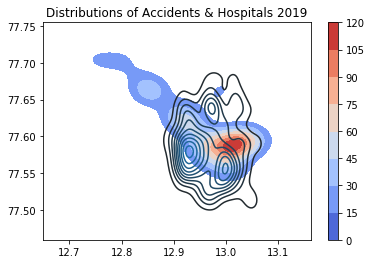

In [14]:
lat_clip  =  min((hosp_lat.min() ,acc_lat.min()))  , max((hosp_lat.max() ,acc_lat.max()))
long_clip =  min((hosp_long.min(),acc_long.min())) , max((hosp_long.max(),acc_long.max()))

hosp_kde_obj = sns.kdeplot(hosp_lat, hosp_long, shade=False,)# cmap='viridis', cbar=True) # clip = (lat_clip, long_clip))
acc_kde_obj  = sns.kdeplot(acc_lat,  acc_long,  shade=True  , cmap='coolwarm', shade_lowest=False, cbar=True ) # clip = (lat_clip, long_clip))

print(plt.xlim(),plt.ylim())

plt.title('Distributions of Accidents & Hospitals 2019')
plt.savefig( 'Distributions of Accidents & Hospitals 2019.PNG' , format='PNG' , dpi=600 , bbox_inches='tight' ,transparent=True)
plt.show()

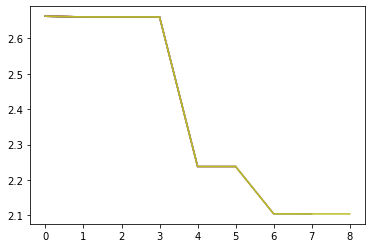

In [49]:
# Mean Distance with hospital placement under uniform random distribution
uniform_mean_closest_hosp_dis, uniform_std_closest_hosp_dis = [], []
for extra_hospitals in range(8+1): #range(len(hosp_lat)+1):
  temp_hosp_lat, temp_hosp_long = list(hosp_lat), list(hosp_long)
  np.random.seed(42)
  # Adding more hospitals
  random_hosp_lat, random_hosp_long = np.random.random((extra_hospitals,2)).T
  random_hosp_lat  = random_hosp_lat*( hosp_lat.max() -hosp_lat.min() ) + hosp_lat.min()
  random_hosp_long = random_hosp_long*(hosp_long.max()-hosp_long.min()) + hosp_long.min()
  temp_hosp_lat  = temp_hosp_lat  + list(random_hosp_lat )
  temp_hosp_long = temp_hosp_long + list(random_hosp_long)
  # Finding closest hospital for each accident & mean from it
  closest_ls = []
  for val_lat, val_long in zip(acc_lat,  acc_long):
    val_loc = np.array([val_lat, val_long])
    closest_ls.append( min([np.linalg.norm(val_loc-np.array(hosp_loc)) for hosp_loc in zip(temp_hosp_lat, temp_hosp_long)]) )
    # break
  closest_ls = np.array(closest_ls)
  uniform_mean_closest_hosp_dis.append( closest_ls.mean() )
  uniform_std_closest_hosp_dis.append(  closest_ls.std()  )

  plt.plot(np.array(uniform_mean_closest_hosp_dis)*111)
  # plt.plot(np.array(uniform_std_closest_hosp_dis)*111)

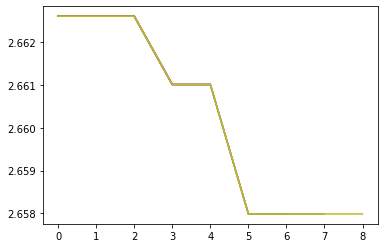

In [50]:
# Mean Distance with hospital placement under gaussian random distribution
gaussian_mean_closest_hosp_dis, gaussian_std_closest_hosp_dis = [], []
for extra_hospitals in range(8+1): #range(len(hosp_lat)+1):
  temp_hosp_lat, temp_hosp_long = list(hosp_lat), list(hosp_long)
  np.random.seed(42)
  # Adding more hospitals
  random_hosp_lat, random_hosp_long = np.random.randn(extra_hospitals,2).T
  random_hosp_lat  = random_hosp_lat  * hosp_lat.std()  + hosp_lat.mean(  )
  random_hosp_long = random_hosp_long * hosp_long.std() + hosp_long.mean( )
  temp_hosp_lat  = temp_hosp_lat  + list(random_hosp_lat )
  temp_hosp_long = temp_hosp_long + list(random_hosp_long)
  # Finding closest hospital for each accident & mean from it
  closest_ls = []
  for val_lat, val_long in zip(acc_lat,  acc_long):
    val_loc = np.array([val_lat, val_long])
    closest_ls.append( min([np.linalg.norm(val_loc-np.array(hosp_loc)) for hosp_loc in zip(temp_hosp_lat, temp_hosp_long)]) )
    # break
  closest_ls = np.array(closest_ls)
  gaussian_mean_closest_hosp_dis.append( closest_ls.mean() )
  gaussian_std_closest_hosp_dis.append(  closest_ls.std()  )

  plt.plot(np.array(gaussian_mean_closest_hosp_dis)*111)
  # plt.plot(np.array(gaussian_std_closest_hosp_dis)*111)

In [51]:
import sklearn
from sklearn.neighbors import KernelDensity

hosp_kde_skl = KernelDensity(bandwidth=0.01)
acc_kde_skl  = KernelDensity(bandwidth=0.01)

hosp_kde_skl.fit( np.array([hosp_lat, hosp_long]).T )
acc_kde_skl.fit(  np.array([acc_lat,  acc_long]).T  )

lat_clip, long_clip

print( acc_lat.mean(), acc_long.mean()   )
print( acc_lat.std(),  acc_long.std() )

12.946762771217948 77.61183788267094
0.07955487498963051 0.04500935815453131


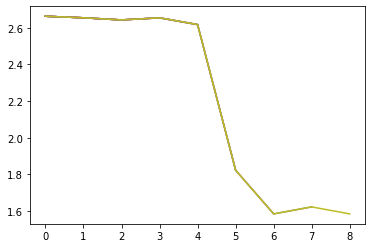

In [52]:
# Mean Distance with hospital placement under kernel density estimation
kde_mean_closest_hosp_dis, kde_std_closest_hosp_dis = [], []
for extra_hospitals in range(8+1): #range(len(hosp_lat)+1):
  temp_hosp_lat, temp_hosp_long = list(hosp_lat), list(hosp_long)
  np.random.seed(42)
  # Adding more hospitals
  random_hosp_lat, random_hosp_long = acc_kde_skl.sample(n_samples=extra_hospitals,random_state=42).T
  temp_hosp_lat  = temp_hosp_lat  + list(random_hosp_lat )
  temp_hosp_long = temp_hosp_long + list(random_hosp_long)
  # Finding closest hospital for each accident & mean from it
  closest_ls = []
  for val_lat, val_long in zip(acc_lat,  acc_long):
    val_loc = np.array([val_lat, val_long])
    closest_ls.append( min([np.linalg.norm(val_loc-np.array(hosp_loc)) for hosp_loc in zip(temp_hosp_lat, temp_hosp_long)]) )
    # break
  closest_ls = np.array(closest_ls)
  kde_mean_closest_hosp_dis.append( closest_ls.mean() )
  kde_std_closest_hosp_dis.append(  closest_ls.std()  )

  plt.plot(np.array(kde_mean_closest_hosp_dis)*111)
  # plt.plot(np.array(kde_std_closest_hosp_dis)*111)

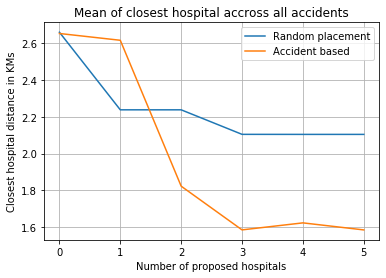

In [55]:
plt.close()

plt.plot(np.array(uniform_mean_closest_hosp_dis)[3:]*111,label='Random placement')
# plt.plot(np.array(gaussian_mean_closest_hosp_dis)[3:]*111)
plt.plot(np.array(kde_mean_closest_hosp_dis)[3:]*111,label='Accident based')

plt.xlabel('Number of proposed hospitals')
plt.ylabel('Closest hospital distance in KMs')
plt.title('Mean of closest hospital accross all accidents')
plt.grid(True)
plt.legend()

plt.savefig( 'Mean of closest hospital accross all accidents.PNG' , format='PNG' , dpi=600 , bbox_inches='tight' ,transparent=True)
plt.show()

In [0]:
#### DEMOGRAPHY wise WARD evel population density analysis

In [16]:
df_demography = pd.read_csv(os.path.join(data_dir,csv_names['DEMOGRAPHY']))

df_demography = df_demography.dropna(axis='rows',how='all')
df_demography = df_demography.dropna(axis='columns')


df_demography['Population Density'] = df_demography['Total Population (in thousands)'] / df_demography['Area (in sq km)']
df_demography.head(2)

,City Name,Zone Name,Ward Name,Ward No.,Area (in sq km),Total Population (in thousands),Population - Male (in thousands),Population - female (in thousands),population - children aged 0-14 (in thousands),Population Density
0,Bengaluru,Yelahanka,Kempegowda Ward,1,10.9,34783,18197,16586,3729,3191.100917
1,Bengaluru,Yelahanka,Chowdeswari Ward,2,6.5,36602,19060,17542,4420,5631.076923


In [0]:
wardno2density = {}
for ix,_ in enumerate(df_demography['Ward Name']):
  wardno2density[ df_demography['Ward No.'][ix] ] = df_demography['Population Density'][ix]

In [0]:
#### WATER DATASET ####

In [19]:
df_water = pd.read_csv(os.path.join(data_dir,csv_names['WATER']))

df_water = df_water.dropna(axis='rows',how='all')
df_water = df_water.dropna(axis='columns')

df_water.head(2)

,City Name,Zone Name,Ward Name,Ward No.,Water tax billed (in INR lakhs)-Total-2013-14,Water tax billed (in INR lakhs)-Commercial-2013-14,Water tax billed (in INR lakhs)-Residential-2013-14,Water tax billed (in INR lakhs)-Total-2014-15,Water tax billed (in INR lakhs)-Commercial-2014-15,Water tax billed (in INR lakhs)-Residential-2014-15,Water tax billed (in INR lakhs)-Total-2015-16,Water tax billed (in INR lakhs)-Commercial-2015-16,Water tax billed (in INR lakhs)-Residential-2015-16,Water tax billed (in INR lakhs)-Total-2016-17,Water tax billed (in INR lakhs)-Commercial-2016-17,Water tax billed (in INR lakhs)-Residential-2016-17,Water tax billed (in INR lakhs)-Total-2017-18,Water tax billed (in INR lakhs)-Commercial-2017-18,Water tax billed (in INR lakhs)-Residential-2017-18,Water tax collected (in INR lakhs)-Total-2013-14,Water tax collected (in INR lakhs)-Commercial-2013-14,Water tax collected (in INR lakhs)-Residential-2013-14,Water tax collected (in INR lakhs)-Total-2014-15,Water tax collected (in INR lakhs)-Commercial-2014-15,Water tax collected (in INR lakhs)-Residential-2014-15,Water tax collected (in INR lakhs)-Total-2015-16,Water tax collected (in INR lakhs)-Commercial-2015-16,Water tax collected (in INR lakhs)-Residential-2015-16,Water tax collected (in INR lakhs)-Total-2016-17,Water tax collected (in INR lakhs)-Commercial-2016-17,Water tax collected (in INR lakhs)-Residential-2016-17,Water tax collected (in INR lakhs)-Total-2017-18,Water tax collected (in INR lakhs)-Commercial-2017-18,Water tax collected (in INR lakhs)-Residential-2017-18
0,Bengaluru City,YALAHANKA,Kempegowda Ward,1.0,11.29,2.51,8.78,37.09,4.63,32.47,72.29,12.94,59.35,65.47,14.62,50.86,63.96,15.75,48.21,8.67731,0.78914,7.89,26.04,3.42,22.62,73.21,13.09,60.11,69.15,14.59,54.56,65.27,15.43,49.84
1,Bengaluru City,YALAHANKA,Chowdeshwari Ward,2.0,5.96,0.20,5.76,13.07,0.56,12.51,14.44,0.73,13.70,12.79,1.31,11.49,12.24,1.15,11.09,4.36199,0.14987,4.21,10.29,0.56,9.73,15.25,0.57,14.68,14.15,1.13,13.02,12.55,0.89,11.66


In [0]:
indices = [str(x) for x in df_water.columns if ('Residential' in x and 'billed' in x)]

wardno2water = {}
wardname2no = {}
for ix,_ in enumerate(df_water['Ward Name']):
  if 1<=df_water['Ward No.'][ix] and df_water['Ward No.'][ix]<=198:
    wardno2water[ int(df_water['Ward No.'][ix]) ] = np.array(df_water[indices].iloc[ix])
    wardname2no[ df_water['Ward Name'][ix].lower() ] = int(df_water['Ward No.'][ix])

In [0]:
ward_coords = {3: (13.1069615, 77.5662992), 4: (13.1042445, 77.5713193), 5: (13.0790322, 77.604432), 6: (13.0559193, 77.6324513), 7: (13.0597892, 77.5933367), 8: (13.0697279, 77.5787819), 9: (13.0810718, 77.55616669999999), 10: (13.060454, 77.5620227), 11: (12.9141933, 77.614665), 12: (12.869655, 76.01815239999999), 13: (13.0606824, 77.5117782), 14: (13.052706, 77.4954875), 15: (13.0507542, 77.5154276), 16: (13.0527646, 77.5418986), 17: (13.0328, 77.5547), 19: (13.0369229, 77.57851339999999), 20: (13.019318, 77.595718), 21: (13.0353557, 77.59878739999999), 22: (13.0388385, 77.6040929), 23: (13.0421565, 77.6135776), 24: (13.0353236, 77.6284701), 25: (13.0326328, 77.6583345), 26: (13.0084887, 77.6737028), 27: (13.0015667, 77.3575662), 28: (13.0159044, 77.63786189999999), 29: (13.0156289, 77.6321339), 30: (13.0186175, 77.61863749999999), 31: (12.4555177, 75.9570234), 32: (13.0236542, 77.60804569999999), 33: (13.0301502, 77.6041181), 34: (12.987447, 77.388183), 35: (13.8215909, 75.0304481), 36: (13.0334194, 77.56397609999999), 37: (13.0250302, 77.53402419999999), 39: (13.0389508, 77.515362), 40: (13.0332887, 77.49062330000001), 41: (13.0285133, 77.5196763), 42: (13.014073, 77.5268296), 43: (13.0136616, 77.5339379), 44: (13.0205708, 77.5515527), 45: (13.0055113, 77.5692358), 46: (12.9867888, 77.5468951), 47: (13.0109482, 77.60946729999999), 48: (12.8962888, 77.64217169999999), 49: (13.0130399, 77.626179), 50: (12.9950739, 77.65531600000001), 51: (13.0024795, 77.6747291), 52: (13.0169992, 77.7044335), 53: (13.013146, 77.71301509999999), 54: (12.992, 77.715), 55: (13.0027035, 77.70156639999999), 56: (12.9933751, 77.67347380000001), 57: (12.9793254, 77.6641841), 58: (12.9717571, 77.6551929), 59: (13.0013782, 77.6298047), 61: (13.0048652, 77.60671219999999), 62: (13.008669, 77.6341424), 63: (12.9998698, 77.5950525), 64: (12.9995954, 77.5837943), 65: (13.3826157, 77.26105030000001), 66: (13.0063819, 77.557643), 67: (13.0021081, 77.5443184), 70: (13.1069615, 77.5662992), 71: (13.1042445, 77.5713193), 72: (13.0790322, 77.604432), 73: (13.0559193, 77.6324513), 74: (13.0597892, 77.5933367), 75: (13.0697279, 77.5787819), 76: (13.0810718, 77.55616669999999), 77: (13.060454, 77.5620227), 78: (12.9141933, 77.614665), 79: (12.869655, 76.01815239999999), 80: (13.0606824, 77.5117782), 81: (13.052706, 77.4954875), 82: (13.0507542, 77.5154276), 83: (13.0527646, 77.5418986), 84: (12.967, 77.567), 86: (13.0369229, 77.57851339999999), 87: (12.95, 77.66833), 88: (13.0353557, 77.59878739999999), 89: (13.0388385, 77.6040929), 90: (13.0421565, 77.6135776), 91: (13.0353236, 77.6284701), 92: (13.0326328, 77.6583345), 93: (13.0084887, 77.6737028), 94: (13.0015667, 77.3575662), 95: (13.0159044, 77.63786189999999), 96: (13.0156289, 77.6321339), 97: (13.0186175, 77.61863749999999), 98: (12.4555177, 75.9570234), 99: (13.0236542, 77.60804569999999), 100: (13.0301502, 77.6041181), 101: (12.987447, 77.388183), 102: (13.8215909, 75.0304481), 103: (13.0334194, 77.56397609999999), 104: (13.0250302, 77.53402419999999), 106: (13.0389508, 77.515362), 107: (13.0332887, 77.49062330000001), 108: (13.0285133, 77.5196763), 109: (13.014073, 77.5268296), 110: (13.0136616, 77.5339379), 111: (13.0205708, 77.5515527), 112: (13.0055113, 77.5692358), 113: (12.9867888, 77.5468951), 114: (13.0109482, 77.60946729999999), 115: (12.8962888, 77.64217169999999), 116: (13.0130399, 77.626179), 117: (12.9950739, 77.65531600000001), 118: (13.0024795, 77.6747291), 119: (13.0169992, 77.7044335), 120: (13.013146, 77.71301509999999), 121: (12.985, 77.567), 122: (13.0027035, 77.70156639999999), 123: (12.9933751, 77.67347380000001), 124: (12.9793254, 77.6641841), 125: (12.9717571, 77.6551929), 126: (13.0013782, 77.6298047), 128: (13.0048652, 77.60671219999999), 129: (13.008669, 77.6341424), 130: (12.9998698, 77.5950525), 131: (12.9995954, 77.5837943), 132: (13.3826157, 77.26105030000001), 133: (13.0063819, 77.557643), 134: (13.0021081, 77.5443184), 137: (13.1069615, 77.5662992), 138: (13.1042445, 77.5713193), 139: (13.0790322, 77.604432), 140: (13.0559193, 77.6324513), 141: (13.0597892, 77.5933367), 142: (13.0697279, 77.5787819), 143: (13.0810718, 77.55616669999999), 144: (13.060454, 77.5620227), 145: (12.9141933, 77.614665), 146: (12.869655, 76.01815239999999), 147: (13.0606824, 77.5117782), 148: (13.052706, 77.4954875), 149: (13.0507542, 77.5154276), 150: (13.0527646, 77.5418986), 151: (12.934533, 77.626579), 153: (13.0369229, 77.57851339999999), 154: (12.94, 77.57), 155: (13.0353557, 77.59878739999999), 156: (13.0388385, 77.6040929), 157: (13.0421565, 77.6135776), 158: (13.0353236, 77.6284701), 159: (13.0326328, 77.6583345), 160: (13.0084887, 77.6737028), 161: (13.0015667, 77.3575662), 162: (13.0159044, 77.63786189999999), 163: (13.0156289, 77.6321339), 164: (13.0186175, 77.61863749999999), 165: (12.4555177, 75.9570234), 166: (13.0236542, 77.60804569999999), 167: (13.0301502, 77.6041181), 168: (12.987447, 77.388183), 169: (13.8215909, 75.0304481), 170: (13.0334194, 77.56397609999999), 171: (13.0250302, 77.53402419999999), 173: (13.0389508, 77.515362), 174: (13.0332887, 77.49062330000001), 175: (13.0285133, 77.5196763), 176: (13.014073, 77.5268296), 177: (13.0136616, 77.5339379), 178: (13.0205708, 77.5515527), 179: (13.0055113, 77.5692358), 180: (12.9867888, 77.5468951), 181: (13.0109482, 77.60946729999999), 182: (12.8962888, 77.64217169999999), 183: (13.0130399, 77.626179), 184: (12.9950739, 77.65531600000001), 185: (13.0024795, 77.6747291), 186: (13.0169992, 77.7044335), 187: (13.013146, 77.71301509999999), 188: (12.0, 77.601027), 189: (13.0027035, 77.70156639999999), 190: (12.9933751, 77.67347380000001), 191: (12.9793254, 77.6641841), 192: (12.9717571, 77.6551929), 193: (13.0013782, 77.6298047), 195: (13.0048652, 77.60671219999999), 196: (13.008669, 77.6341424), 197: (12.9998698, 77.5950525), 198: (12.9995954, 77.5837943)}

ward_coords[1] = (13.1986, 77.7066)
ward_coords[2] = (12.9643, 77.5527)
ward_coords[18] = (13.0098, 77.5511)
ward_coords[38] = (13.0200, 77.5844)
ward_coords[60] = (13.0071, 77.6171)
ward_coords[68] = (13.0146, 77.5514)
ward_coords[69] = (13.0098, 77.5254)
ward_coords[85] = (12.9716, 77.6942)
ward_coords[105] = (12.9811, 77.5438)
ward_coords[127] = (12.9722, 77.5234)
ward_coords[135] = (12.9646, 77.5496)
ward_coords[136] = (12.9656, 77.5507)
ward_coords[152] = (12.9309, 77.6097)
ward_coords[172] = (12.9226, 77.6174)
ward_coords[194] = (12.8564, 77.5888)

wardno2coords = ward_coords

(12.838815236705205, 13.115869999383323) (77.46000039653612, 77.7340448391391)


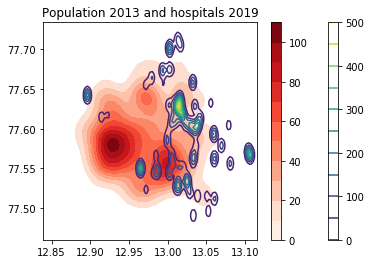

198


In [41]:
population_density = []
valid_ward_no = []
for wardno in wardno2coords:
  if wardno!=6:
    ward_lat, ward_long = wardno2coords[wardno]
    if (12.75<=ward_lat and ward_lat<=13.15) and (77.45<=ward_long and ward_long<=80):
      population_density.extend( [wardno2coords[wardno],]*(int(wardno2density[wardno])//100) )
      valid_ward_no.append(wardno)
population_density = np.array(population_density).T

# for wardno in list(wardno2coords.keys()):
#   if wardno not in valid_ward_no:
#     del wardno2coords[wardno]

sns.kdeplot(population_density[0],population_density[1],shade=False,shade_lowest=False,cmap='viridis',cbar=True)
sns.kdeplot(hosp_lat, hosp_long, shade=True,shade_lowest=False,cmap='Reds',cbar=True)

print(plt.xlim(),plt.ylim())

plt.title('Population 2013 and hospitals 2019')
plt.savefig( 'Population 2013 and hospitals 2019.PNG' , format='PNG' , dpi=600 , bbox_inches='tight' ,transparent=True)
plt.show()

print(len(wardno2coords))

In [23]:
sum(wardno2density.values())
print( population_density[0].min(), population_density[0].max() )
print( population_density[1].min(),population_density[1].max() )

for wardno in wardno2coords:
  x,y = wardno2coords[wardno]
  if (x<12 or x>15) or (y<75 or y>80):
    print(wardno, wardno2coords[wardno])

sum(x//1000 for x in wardno2density.values())
population_density.shape
len(set(population_density[0])), len(set(population_density[1]))
# plt.scatter(np.array(list(wardno2coords.values())).T[0] , np.array(list(wardno2coords.values())).T[1])
# plt.show()
# for wardno in list(wardno2water.keys()):
#   if wardno not in valid_ward_no:
#     del wardno2water[wardno]
np.array(list(wardno2coords.values())).shape

12.8564 13.1069615
77.49062330000001 77.715


(198, 2)

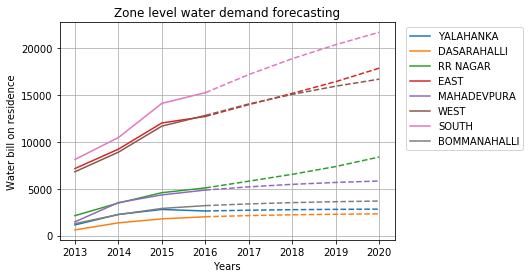

In [24]:
wardno2zonename = {}
for ix,_ in enumerate(df_water['Ward No.']):
  if True or _ in valid_ward_no:
    wardno2zonename[df_water['Ward No.'][ix]] = df_water['Zone Name'][ix]

# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
zonename2water = {}
wardno2waterpred = {}

for wardno in list(wardno2water):
  data = wardno2water[wardno]
  # fit model
  try:
    model_fit = ExponentialSmoothing(data,trend='mul',damped=True).fit()
  except:
    pass
    # print(data)
  # make prediction
  pred = model_fit.predict(start=len(data), end=len(data)+4)
  # print(data)
  # print(pred)
  # print(len(data),len(pred))
  wardno2waterpred[wardno] = np.array(list(data)+list(pred))
  if wardno2zonename[wardno] not in zonename2water:
    zonename2water[ wardno2zonename[wardno] ] = [1,(data,pred)]
  else:
    count = zonename2water[ wardno2zonename[wardno] ][0] + 1
    data = data + zonename2water[ wardno2zonename[wardno] ][1][0]
    pred = pred + zonename2water[ wardno2zonename[wardno] ][1][1]
    zonename2water[ wardno2zonename[wardno] ] = [1,(data,pred)]

temp = {}
for key in zonename2water:
  if key not in ('BOMMANAHALLI', 'BOMMANHALLI'):
    temp[key] = zonename2water[key][1][0]/zonename2water[key][0] , zonename2water[key][1][1]/zonename2water[key][0]

v1 = (zonename2water['BOMMANAHALLI'][1][0]+zonename2water['BOMMANHALLI'][1][0])/(zonename2water['BOMMANAHALLI'][0]+zonename2water['BOMMANHALLI'][0])
v2 = (zonename2water['BOMMANAHALLI'][1][1]+zonename2water['BOMMANHALLI'][1][1])/(zonename2water['BOMMANAHALLI'][0]+zonename2water['BOMMANHALLI'][0])
temp['BOMMANAHALLI'] = v1,v2

zonename2water = temp

color_list = list(mcolors.TABLEAU_COLORS.keys())
legend_handles, legend_labels = [], []
for ix, zone_name in enumerate(zonename2water):
  v1 = len(zonename2water[zone_name][0])
  v2 = len(zonename2water[zone_name][1])
  ls1 = zonename2water[zone_name][0][:-1]
  ls2 = zonename2water[zone_name][1]
  line_handle = plt.plot(list(range(0  , v1-1   )), ls1,color=color_list[ix],linestyle='-')[0]
  plt.plot(list(range(v1-2 , v1+v2-2)), ls2-(ls2[0]-ls1[-1]),color=color_list[ix],linestyle='--')

  legend_handles.append( line_handle )
  legend_labels.append(  zone_name )

plt.grid(True)
plt.legend( legend_handles,legend_labels,loc='upper right', bbox_to_anchor=(1.4, 1.0) )
plt.title( 'Zone level water demand forecasting' )
plt.xlabel('Years')
plt.ylabel('Water bill on residence')
plt.xticks(  list(range(0 , v1+v2-2)) , list(range(2013 , 2013+v1+v2-2))  )
plt.savefig( 'Water bill on residence.PNG' , format='PNG' , dpi=600 , bbox_inches='tight' )
plt.show()

(2, 216778)
(12.846992521645788, 13.116368978354213) (77.47613792194664, 77.72948537805337)


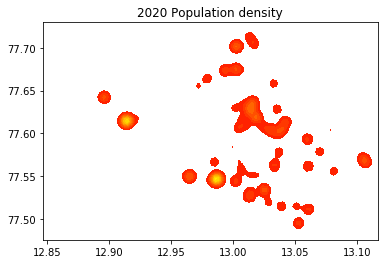

In [25]:
for year_ix in range(8):
  yearwardno2density = {}
  yearpopulation_density = []
  for wardno in valid_ward_no:
    try:
      year_density = wardno2density[wardno]*wardno2waterpred[wardno][year_ix]/wardno2waterpred[wardno][0]
      yearwardno2density[wardno] = year_density
      ward_lat, ward_long = wardno2coords[wardno]
      yearpopulation_density.extend( [wardno2coords[wardno],]*(int(yearwardno2density[wardno])//100) )
    except:
      pass
  yearpopulation_density = np.array(yearpopulation_density).T
  print( yearpopulation_density.shape )

  sns.kdeplot(yearpopulation_density[0],yearpopulation_density[1],shade=True,shade_lowest=False,cmap='autumn',cbar=False, vmin=0, vmax=900)
  # sns.kdeplot(hosp_lat, hosp_long, shade=True,shade_lowest=False,cmap='Reds',cbar=True)
  print(plt.xlim(),plt.ylim())
  plt.title('{} Population density'.format(2013+year_ix))
  # plt.savefig( '{} Population density.PNG'.format(2013+year_ix) , format='PNG' , dpi=600 , bbox_inches='tight' ,transparent=True)
  # plt.show()

In [0]:
# set(valid_ward_no)

(2, 216778)
(12.838815236705205, 13.116368978354213) (77.46000039653612, 77.72948537805337)


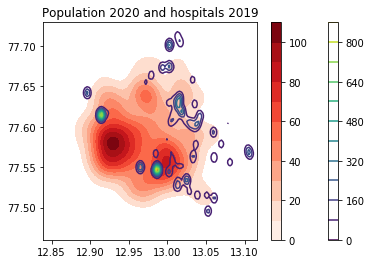

In [42]:
print( yearpopulation_density.shape )

sns.kdeplot(yearpopulation_density[0],yearpopulation_density[1],shade=False,shade_lowest=False,cmap='viridis',cbar=True)
sns.kdeplot(hosp_lat, hosp_long, shade=True,shade_lowest=False,cmap='Reds',cbar=True)

print(plt.xlim(),plt.ylim())

plt.title('Population 2020 and hospitals 2019')
plt.savefig( 'Population 2020 and hospitals 2019.PNG' , format='PNG' , dpi=600 , bbox_inches='tight' ,transparent=True)
plt.show()

In [0]:
(lat_min, lat_max), (long_min, long_max) = (12.846992521645788, 13.116368978354213),(77.47613792194664, 77.72948537805337)

In [40]:
df_schools = pd.read_csv(os.path.join(data_dir,csv_names['SCHOOLS']))

df_schools = df_schools.dropna(axis='rows',how='all')
df_schools = df_schools.dropna(axis='columns')

school_lat, school_long = [], []
for val_lat, val_long in np.array(df_schools):
  if (lat_min<=val_lat and val_lat<=lat_max) and (long_min<=val_long and val_long<=long_max):
    school_lat.append(  val_lat )
    school_long.append( val_long )

school_lat, school_long = np.array(school_lat), np.array(school_long)
len(school_lat)

1676

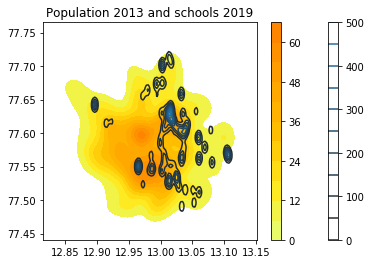

In [47]:
sns.kdeplot(population_density[0], population_density[1],shade=False,shade_lowest=False,cbar=True)
sns.kdeplot(school_lat, school_long, shade=True,shade_lowest=False,cmap='Wistia',cbar=True)

plt.title('Population 2013 and schools 2019')
plt.savefig( 'Population 2013 and schools 2019.PNG' , format='PNG' , dpi=600 , bbox_inches='tight' ,transparent=True)
plt.show()

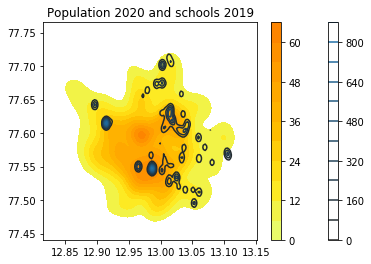

In [48]:
sns.kdeplot(yearpopulation_density[0],yearpopulation_density[1],shade=False,shade_lowest=False,cbar=True)
sns.kdeplot(school_lat, school_long, shade=True,shade_lowest=False,cmap='Wistia',cbar=True)

plt.title('Population 2020 and schools 2019')
plt.savefig( 'Population 2020 and schools 2019.PNG' , format='PNG' , dpi=600 , bbox_inches='tight' ,transparent=True)
plt.show()